# In this notebook we will learn how to build a simple NN
* With wrapper from nn (easy but less flexible)
* Using module to construct our own NN (flexible enough)

In [2]:
import torch
from torch.autograd import Variable
from torch import nn
from torch.nn import Parameter, functional as F

In [ ]:
# What is a 'Parameter'? 
Parameter?? # required_grad = true (Default)

### Diff between nn.linear vs. F.linear

In [10]:
# What about a 'nn.Linear'?
nn.Linear?? #class

In [ ]:
F.linear?? #returns output, also diff signtures

In [ ]:
! pip install git+https://github.com/szagoruyko/pytorchviz
! brew install graphviz  # or ! sudo apt-get install graphviz

In [1]:
from collections import OrderedDict
from torchviz import make_dot, make_dot_from_trace

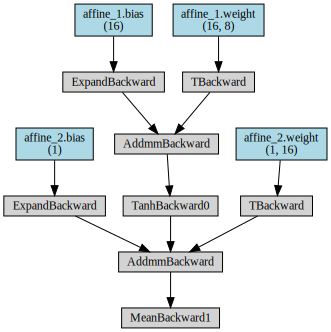

In [3]:
# Building a sequential net, using wrapper
model1 = nn.Sequential(OrderedDict([
    ('affine_1',nn.Linear(8,16)),
    ('tanh', nn.Tanh()),
    ('affine_2', nn.Linear(16,1)),
]))

x= Variable(torch.randn(1,8))
y = model1(x)
make_dot(y.mean(), params=dict(model1.named_parameters()))

In [7]:
# Building custom sequential net
class Model2(nn.Module):
    def __init__(self,n,d,K):
        super().__init__()
        self.affine1 = nn.Linear(n, d)
        self.affine2 = nn.Linear(d, K)
    def forward(self, x):
        x = self.affine1(x)
        x = F.tanh(x)
        x= self.affine2(x)
        return x
model2 = Model2(8,16,1)    

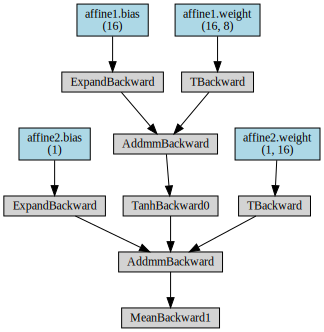

In [8]:
x = Variable(torch.randn(1,8))
y = model2(x)
make_dot(y.mean(), params=dict(model2.named_parameters()))